In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from IPython.display import display
import os
#plt.style.use("seaborn")
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

In [83]:
cac_data = pd.read_csv('cac_dataset\customer_acquistion_costs.csv')
cac_data.sample(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
28071,Baking Goods,Baking Goods,Food,3.99,1.8354,3.0,Pick Your Savings,Mexico,M,M,...,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,Radio,56.49
52512,Hygiene,Health and Hygiene,Non-Consumable,1.95,0.9165,3.0,High Roller Savings,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
39771,Snack Foods,Snack Foods,Food,7.78,3.0342,2.0,Two for One,USA,M,M,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",57.52
44921,Magazines,Periodicals,Non-Consumable,3.38,1.4872,2.0,Three for One,Mexico,M,F,...,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio",131.62
34870,Paper Products,Household,Non-Consumable,17.25,5.5200,5.0,Money Savers,USA,S,M,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,"Sunday Paper, Radio, TV",82.61


In [84]:
cac_data = cac_data.drop(["avg_cars_at home(approx).1"], axis=1)

In [85]:
cac_data.shape

(60428, 39)

In [86]:
cac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [87]:
cac_data.isna().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
avg_cars_at home(approx)    0
avg. yearly_income          0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

In [88]:
cac_data.describe().T.style.bar(subset=['mean'], color='#E68193').background_gradient(subset=['std'], cmap='mako_r').background_gradient(subset=['50%'], cmap='mako')

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.000000,6.541031,3.463047,0.510000,3.810000,5.940000,8.670000,22.920000
store_cost(in millions),60428.000000,2.619460,1.453009,0.163200,1.500000,2.385600,3.484025,9.726500
unit_sales(in millions),60428.000000,3.093169,0.827677,1.000000,3.000000,3.000000,4.000000,6.000000
total_children,60428.000000,2.533875,1.490165,0.000000,1.000000,3.000000,4.000000,5.000000
avg_cars_at home(approx),60428.000000,2.200271,1.109644,0.000000,1.000000,2.000000,3.000000,4.000000
num_children_at_home,60428.000000,0.829351,1.303424,0.000000,0.000000,0.000000,1.000000,5.000000
SRP,60428.000000,2.115258,0.932829,0.500000,1.410000,2.130000,2.790000,3.980000
gross_weight,60428.000000,13.806433,4.622693,6.000000,9.700000,13.600000,17.700000,21.900000
net_weight,60428.000000,11.796289,4.682986,3.050000,7.710000,11.600000,16.000000,20.800000
recyclable_package,60428.000000,0.558665,0.496551,0.000000,0.000000,1.000000,1.000000,1.000000


##### The above helps realise that there is a huge difference in the scale of the columns which might affect distance based machine learning models

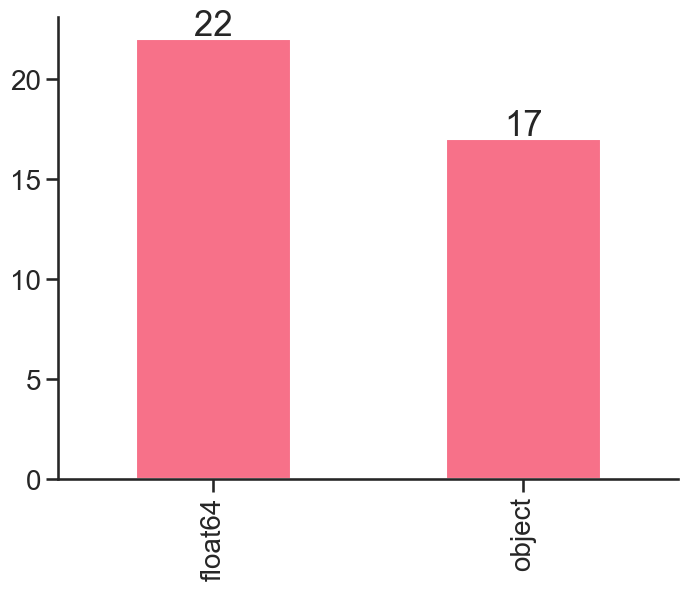

In [89]:
sns.set(style="ticks", context="talk",font_scale = 1,palette="husl")
plt.figure(figsize = (8,6))
ax = cac_data.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25)
sns.despine()

In [90]:
cac_columns = list(cac_data.columns)

In [91]:
categorical_features = cac_data.select_dtypes(include="object").columns
numerical_features = cac_data.select_dtypes(exclude="object").columns

In [92]:
nums_f = ['store_sales(in millions)', 'store_cost(in millions)','SRP','gross_weight', 'net_weight','cost']
cats_f = [col for col in cac_columns if col not in nums_f]
len(cats_f), len(nums_f)

(33, 6)

In [93]:
from scipy.stats import skew, kurtosis
sk = skew(cac_data[nums_f[0]], axis=0, bias=True)
k = kurtosis(cac_data[nums_f[0]], axis=0, bias=True)
sk,k

(0.678365928582688, 0.09289535812976668)

In [94]:
categorical_features

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [95]:
numerical_features

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'SRP', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist', 'cost'],
      dtype='object')

store_sales(in millions) : 1033
store_cost(in millions) : 9919
unit_sales(in millions) : 6
total_children : 6
avg_cars_at home(approx) : 5
num_children_at_home : 6
SRP : 315
gross_weight : 376
net_weight : 332
recyclable_package : 2
low_fat : 2
units_per_case : 36
store_sqft : 20
grocery_sqft : 20
frozen_sqft : 20
meat_sqft : 20
coffee_bar : 2
video_store : 2
salad_bar : 2
prepared_food : 2
florist : 2
cost : 328


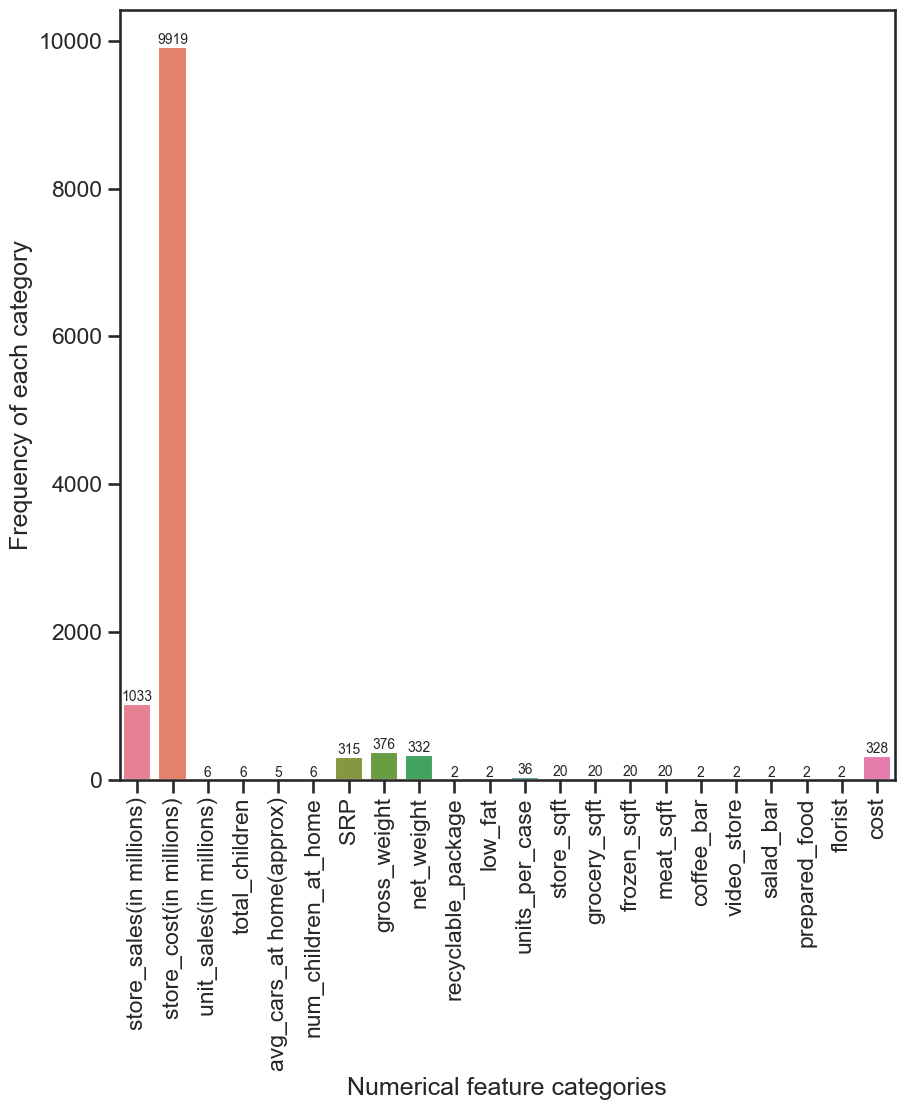

In [96]:
numerical_categories = cac_data[numerical_features].nunique()
for col in numerical_features:
    print(f'{col} : {numerical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Numerical feature categories')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of each category')
ax = sns.barplot(x = numerical_features, y = numerical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

In [97]:
numerical_categories

store_sales(in millions)    1033
store_cost(in millions)     9919
unit_sales(in millions)        6
total_children                 6
avg_cars_at home(approx)       5
num_children_at_home           6
SRP                          315
gross_weight                 376
net_weight                   332
recyclable_package             2
low_fat                        2
units_per_case                36
store_sqft                    20
grocery_sqft                  20
frozen_sqft                   20
meat_sqft                     20
coffee_bar                     2
video_store                    2
salad_bar                      2
prepared_food                  2
florist                        2
cost                         328
dtype: int64

food_category : 45
food_department : 22
food_family : 3
promotion_name : 49
sales_country : 3
marital_status : 2
gender : 2
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg. yearly_income : 8
brand_name : 111
store_type : 5
store_city : 19
store_state : 10
media_type : 13


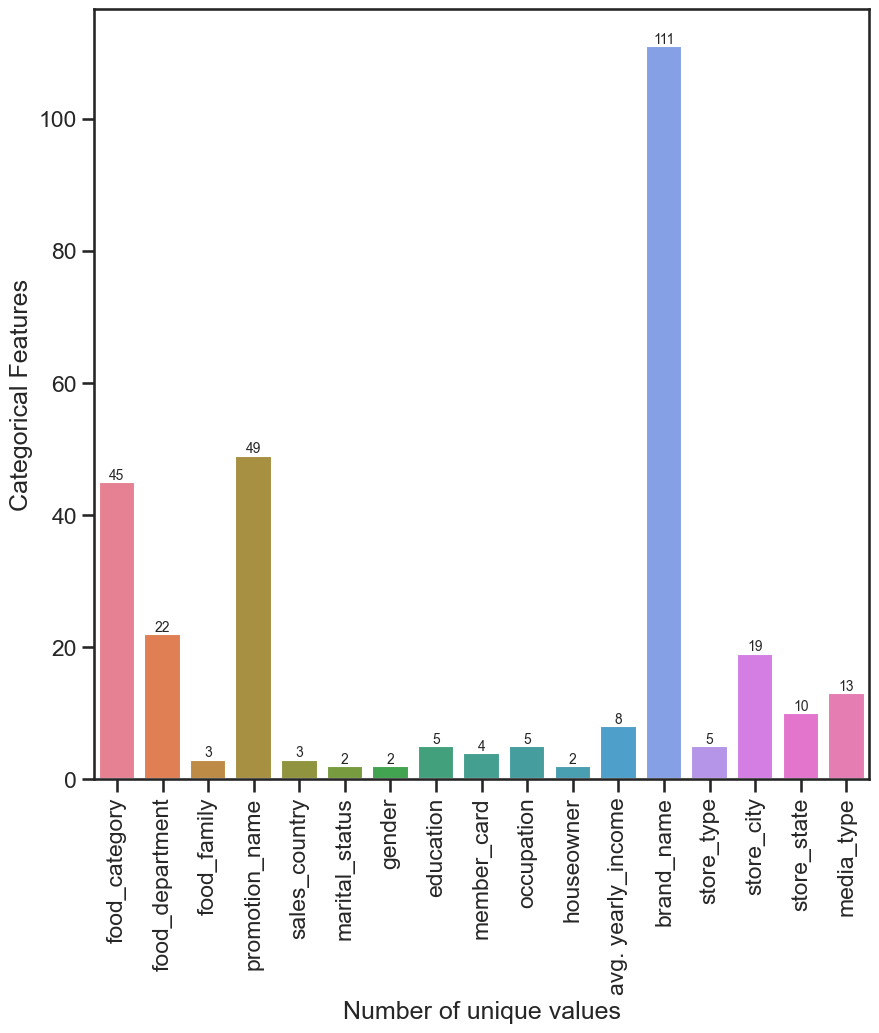

In [98]:
categorical_categories = cac_data[categorical_features].nunique()
for col in categorical_features:
    print(f'{col} : {categorical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Number of unique values')
plt.xticks(rotation = 90)
plt.ylabel('Categorical Features')
ax = sns.barplot(x = categorical_features, y = categorical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

In [99]:
categories_dictionary = {col : list(cac_data[col].unique()) for col in categorical_features}
for key in categories_dictionary.keys():
    print(f'{key} : {categories_dictionary[key]}')

food_category : ['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods', 'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat', 'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages', 'Seafood', 'Specialty', 'Kitchen Products', 'Electrical', 'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages', 'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware', 'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes', 'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza', 'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene', 'Plastic Products', 'Canned Oysters', 'Packaged Vegetables', 'Miscellaneous']
food_department : ['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods', 'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood', 'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs', 'Periodical

In [100]:
list(cac_data["media_type"].unique())

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [101]:
np.transpose(list(cac_data["media_type"].value_counts()))

array([6820, 5371, 5284, 5119, 5069, 4980, 4859, 4495, 4050, 4002, 3576,
       3457, 3346])

In [102]:
dict = {cac_data["media_type"].unique()[i] : cac_data["media_type"].value_counts()[i] for i in range(len(cac_data["media_type"].unique()))}

In [103]:
option_cat_df = pd.DataFrame(dict.items(), columns = ["media_type", "Count"])

In [104]:
list(option_cat_df["media_type"])

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [105]:
dict

{'Daily Paper, Radio': 6820,
 'In-Store Coupon': 5371,
 'Radio': 5284,
 'Daily Paper': 5119,
 'Product Attachment': 5069,
 'Sunday Paper, Radio': 4980,
 'Sunday Paper, Radio, TV': 4859,
 'Sunday Paper': 4495,
 'Street Handout': 4050,
 'TV': 4002,
 'Bulk Mail': 3576,
 'Cash Register Handout': 3457,
 'Daily Paper, Radio, TV': 3346}

##### NO. of children for a customer

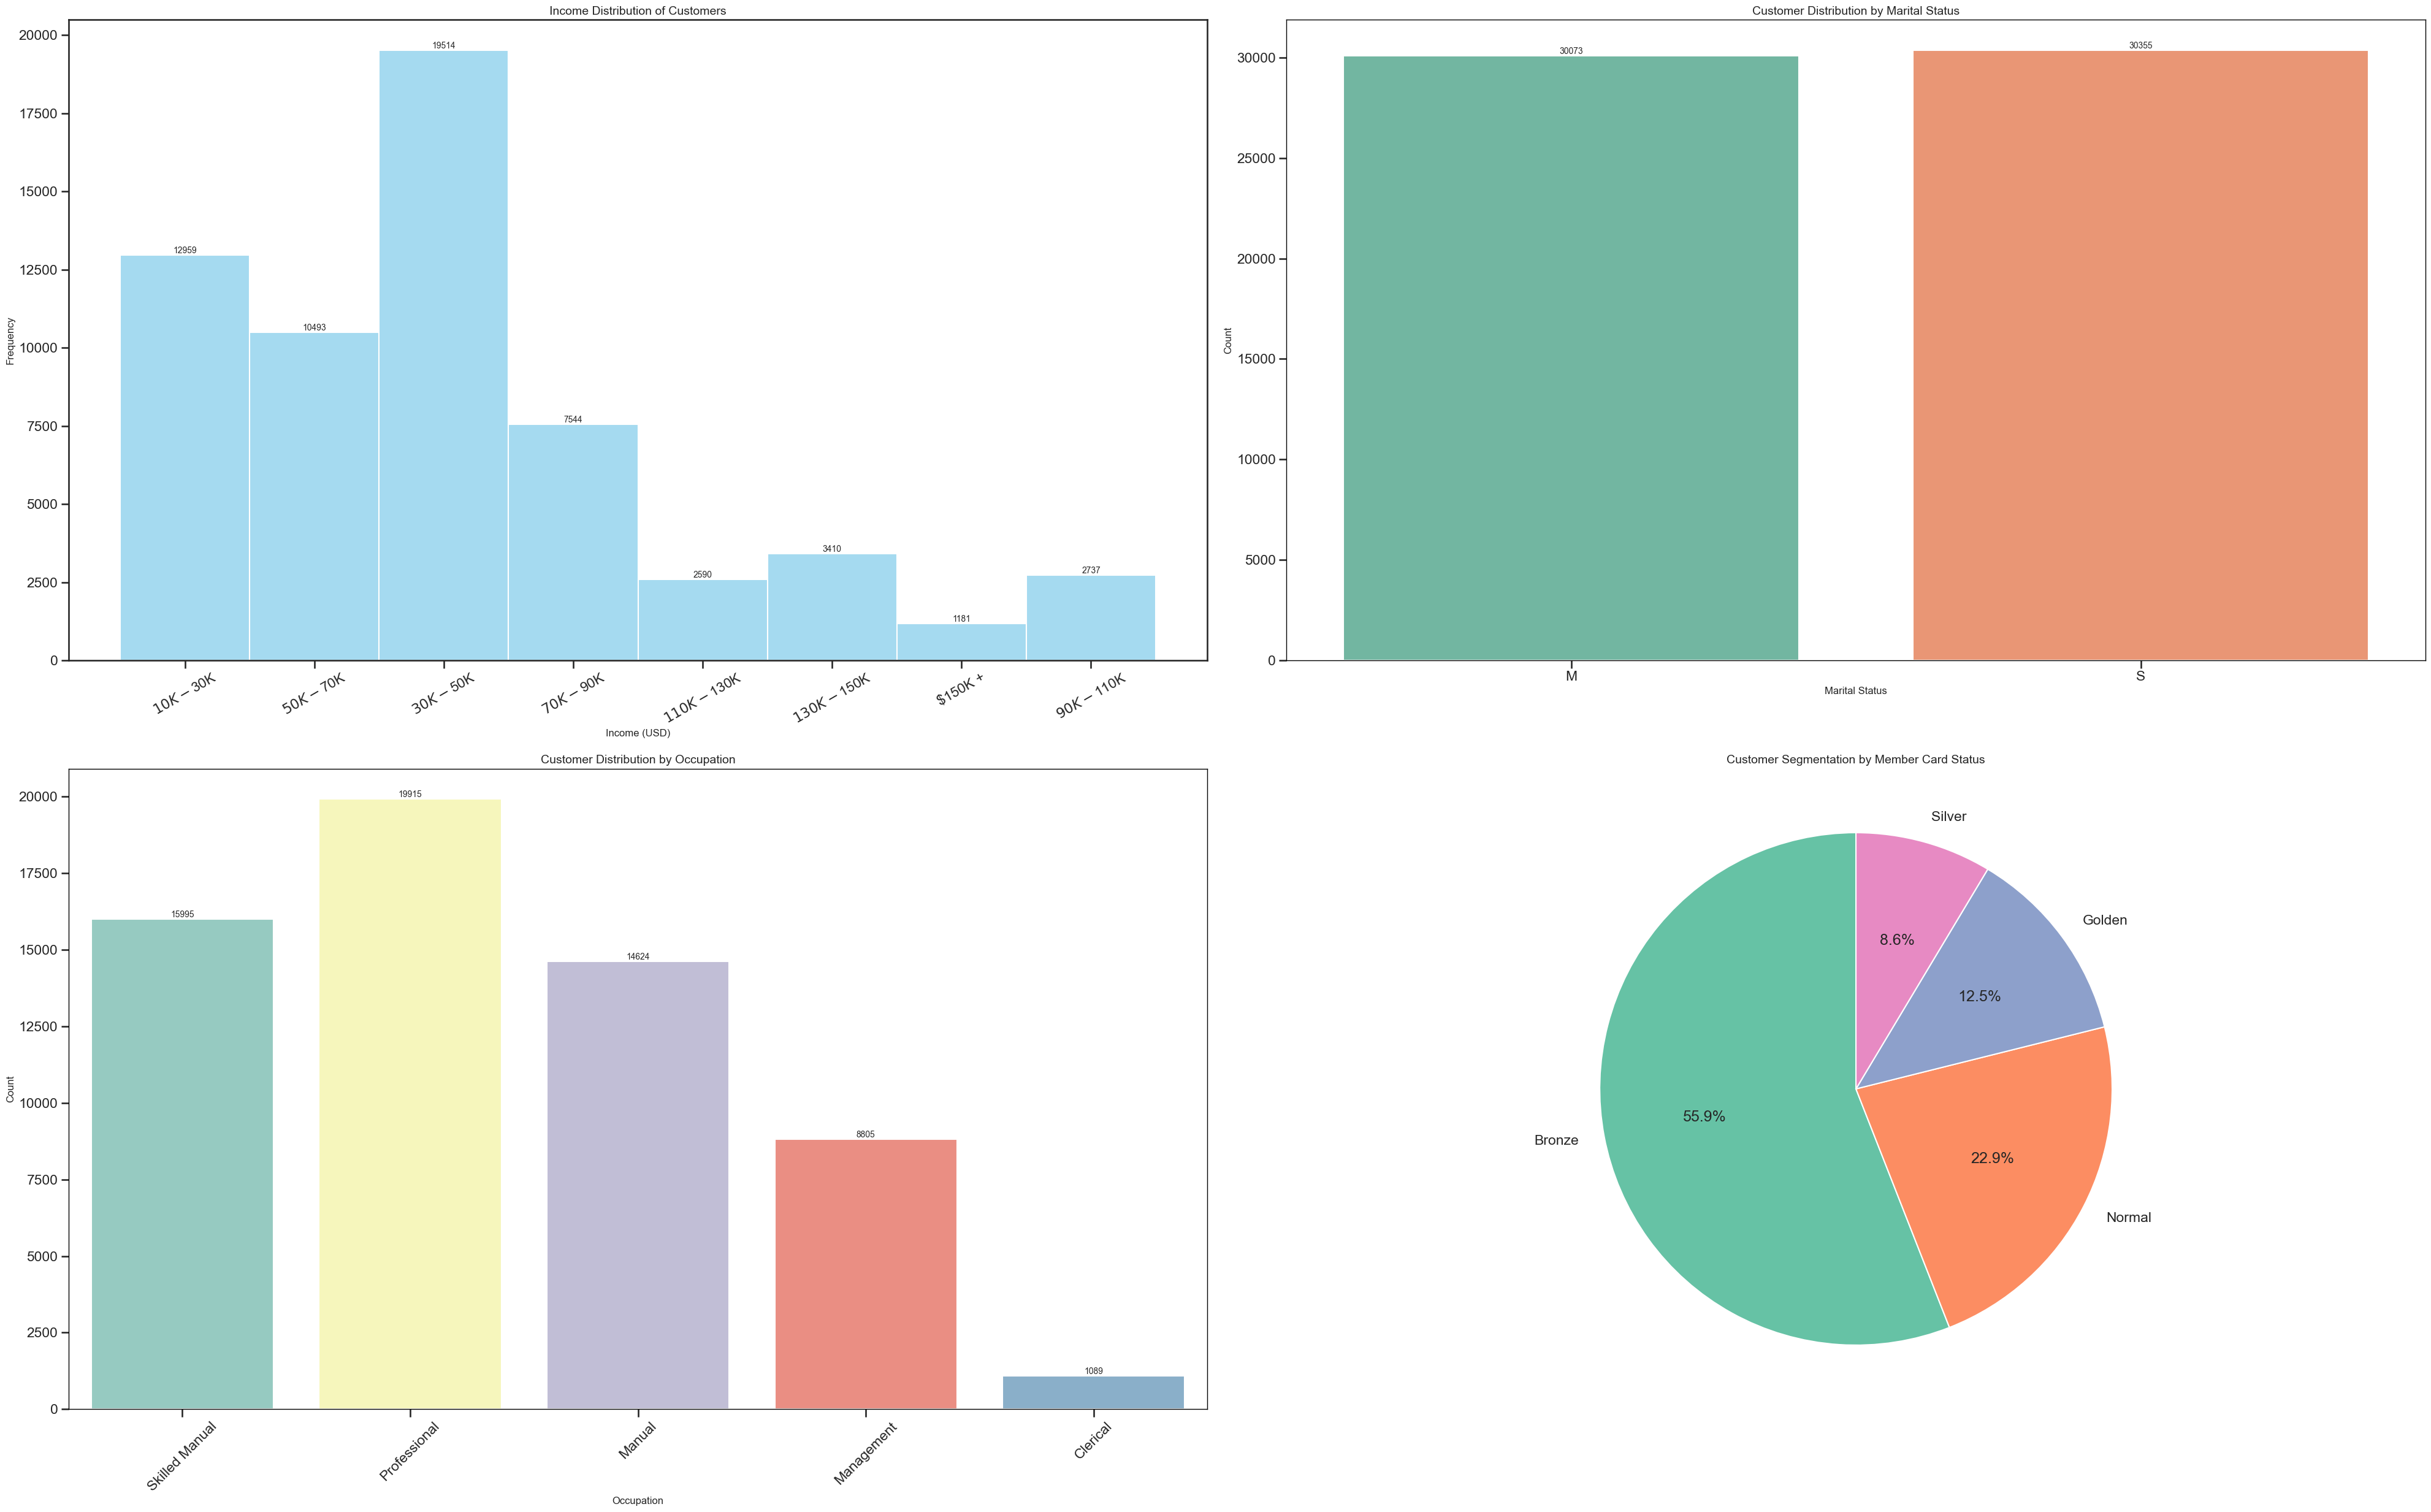

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(40, 25))

# 1. Histogram for Customer Income Distribution
sns.histplot(cac_data['avg. yearly_income'], kde=False, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution of Customers', fontsize=14)
axes[0, 0].set_xlabel('Income (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=30)
for i in axes[0,0].containers:
    axes[0,0].bar_label(i, label_type = 'edge', fontsize = 10)  # Rotate x labels for better readability

# 2. Countplot for Customer Demographics (Marital Status)
sns.countplot(x='marital_status', data=cac_data, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Customer Distribution by Marital Status', fontsize=14)
axes[0, 1].set_xlabel('Marital Status', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
for i in axes[0,1].containers:
    axes[0,1].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[0, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 3. Countplot for Customer Occupation
sns.countplot(x='occupation', data=cac_data, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Customer Distribution by Occupation', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
for i in axes[1,0].containers:
    axes[1,0].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[1, 0].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 4. Pie Chart for Customer Segmentation (Member Card Status)
customer_segments = cac_data['member_card'].value_counts()
axes[1, 1].pie(customer_segments, autopct='%1.1f%%', colors=sns.color_palette('Set2'), labels=customer_segments.index, startangle=90)
axes[1, 1].set_title('Customer Segmentation by Member Card Status', fontsize=14)
# Add borders around the pie chart
for spine in axes[1, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.show()

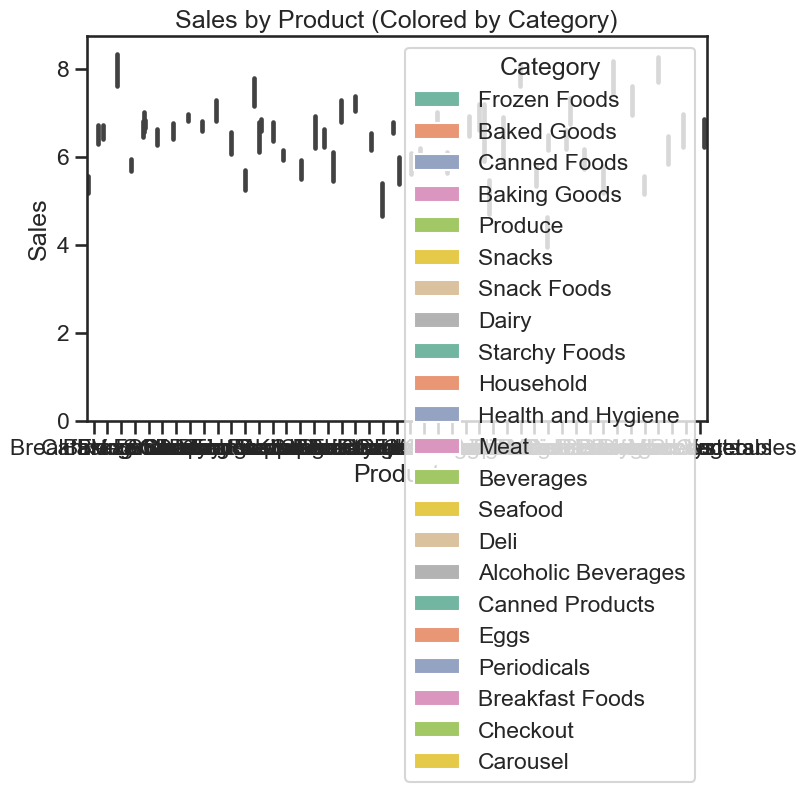

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataset
data = pd.DataFrame({
    'Product': ['Laptop', 'Shirt', 'Sofa', 'Phone', 'Pants'],
    'Sales': [500, 300, 700, 600, 400],
    'Category': ['Electronics', 'Clothing', 'Furniture', 'Electronics', 'Clothing']
})

# Create a bar chart with colors based on the 'Category' column
plt.figure(figsize=(8, 5))
sns.barplot(x=cats_f[0], y=nums_f[0], hue=cats_f[1], data=cac_data, palette='Set2')

# Labels and title
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product (Colored by Category)')
plt.legend(title='Category')

# Show the plot
plt.show()


In [108]:
cac_data["avg_cars_at home(approx)"].value_counts()

avg_cars_at home(approx)
2.0    18268
3.0    16961
1.0    13643
4.0     7974
0.0     3582
Name: count, dtype: int64

In [109]:
cac_data["avg_cars_at home(approx)"].value_counts()[0]

3582

In [110]:
cac_data["store_sqft"].unique()

array([27694., 33858., 21215., 30268., 23598., 23688., 20319., 28206.,
       34791., 30797., 38382., 30584., 36509., 23112., 39696., 23759.,
       24597., 23593., 22478., 34452.])

In [114]:
cac_data["store_sqft"].value_counts()

store_sqft
33858.0    5704
27694.0    5478
20319.0    5150
21215.0    5051
30797.0    4498
30268.0    4453
23688.0    4151
23598.0    3960
30584.0    3890
39696.0    3451
23112.0    3384
34791.0    2621
23759.0    2352
23593.0    1506
36509.0    1395
38382.0     871
22478.0     783
28206.0     711
34452.0     580
24597.0     439
Name: count, dtype: int64

In [ ]:
cac_data["food_department"].value_counts()

food_department
Produce                8521
Snack Foods            6919
Household              6185
Frozen Foods           6126
Baking Goods           4497
Canned Foods           4238
Dairy                  3835
Health and Hygiene     3807
Beverages              3014
Deli                   2787
Baked Goods            1797
Alcoholic Beverages    1590
Snacks                 1538
Starchy Foods          1103
Periodicals             971
Eggs                    952
Breakfast Foods         778
Canned Products         400
Checkout                385
Meat                    385
Seafood                 375
Carousel                225
Name: count, dtype: int64

In [115]:
dict = {i : cac_data["unit_sales(in millions)"].value_counts()[i] for i in cac_data["unit_sales(in millions)"].unique()}

In [116]:
dict

{4.0: 16581, 3.0: 27482, 2.0: 13417, 5.0: 2058, 6.0: 26, 1.0: 864}

In [ ]:
numerical_features

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [ ]:
categorical_features

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [ ]:
for col in numnp.min(cac_data["florist"])

0.0

In [123]:
color_list = []
for col in numerical_features:
    if np.max(cac_data[col])<7 and col!='SRP':
        color_list.append(col)
        print(col,np.min(cac_data[col]), np.max(cac_data[col]))

unit_sales(in millions) 1.0 6.0
total_children 0.0 5.0
avg_cars_at home(approx) 0.0 4.0
num_children_at_home 0.0 5.0
recyclable_package 0.0 1.0
low_fat 0.0 1.0
coffee_bar 0.0 1.0
video_store 0.0 1.0
salad_bar 0.0 1.0
prepared_food 0.0 1.0
florist 0.0 1.0


In [126]:
for col in categorical_features:
    if len(cac_data[col].unique())<6:
        color_list.append(col)

In [127]:
color_list

['unit_sales(in millions)',
 'total_children',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'food_family',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'store_type']

In [ ]:
color_list = ['unit_sales(in millions)','total_children','avg_cars_at home(approx)','num_children_at_home','recyclable_package',
 'low_fat','coffee_bar','video_store','salad_bar','prepared_food','florist','food_family','sales_country','marital_status',
 'gender','education','member_card','occupation','houseowner','store_type']